# Primary innate response score calculation in R.aegyptiacus PBMC's


In [ ]:
### Scoring is done on Poly(I:C) and LPS infected cells within chosen cell types
### Same scoring method was used in other scores analyses

In [105]:
%%time
import scanpy as sc
import anndata as ad
import pandas as pd

Wall time: 0 ns


In [106]:
# Load bat PBMC's data
adata = sc.read(r"C:\Users\TzachiHNB6\Documents\annotated_count_matrices\bat\blood\bat_mouse_integration\PBMCs_annotated_raw_bat1k\PBMCs_annotated_raw_bat1k.h5ad") 

In [107]:
# Load bat PBMC's metadata
bat_metadata = pd.read_csv(r"C:\Users\TzachiHNB6\Downloads\pbmcs_bat1k_metadata.csv")
adata.obs  = bat_metadata

In [108]:
adata_copy = adata.copy()

C:\Users\TzachiHNB6\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
# Keep only the relevant cell types
adata_copy = adata_copy[adata_copy.obs.inter_species_ann.isin([ 'Neutrophils',
 'Monocytes_CD14',
 'Monocytes_CD16',
 'Monocytes_IFNB1',
 'DC_activated',
 'pDCs',
 'T_CD4',
 'T_CD8/NKT',
 'NK',
 'B',
 'B_CD83',
 ])]

# Keep only LPS/Poly(I:C) indected cells
adata_copy = adata_copy[adata_copy.obs["batch"].isin(["LPS","Poly(I:C)"])]

In [109]:
# Load DE results between Poly(I:C) and CTRL cells done in different species
de_pic_ctrl = pd.read_excel(r"C:\Users\TzachiHNB6\Downloads\pIC_up_six_mammals_fiborblasts.xlsx")

In [110]:
# Only keep human, mouse and R.aegyptiacus) DE results
de_pic_ctrl = de_pic_ctrl [["Homo sapiens_ortho_gene","Mus musculus_ortho_gene","Rousettus aegyptiacus_ortho_gene","Homo sapiens FC","Homo sapiens Q-value","Mus musculus FC","Mus musculus Q-value","Rousettus aegyptiacus FC","Rousettus aegyptiacus Q-value"]]

In [93]:
de_pic_ctrl

,Homo sapiens_ortho_gene,Mus musculus_ortho_gene,Rousettus aegyptiacus_ortho_gene,Homo sapiens FC,Homo sapiens Q-value,Mus musculus FC,Mus musculus Q-value,Rousettus aegyptiacus FC,Rousettus aegyptiacus Q-value
0,ENSG00000073150,ENSMUSG00000058441,PANX2,-0.183853,9.805681e-01,-1.361561,1.000000,-1.348909,4.680358e-01
1,ENSG00000119965,ENSMUSG00000040177,LOC107516000,-0.010579,1.000000e+00,0.029759,1.000000,0.019585,1.000000e+00
2,ENSG00000127578,ENSMUSG00000071192,WFIKKN1,1.109798,7.740795e-01,0.827554,0.788337,0.620247,6.491871e-01
3,ENSG00000109270,ENSMUSG00000091512,LAMTOR3,-0.078400,1.000000e+00,-0.009332,1.000000,0.182063,3.781288e-01
4,ENSG00000149262,ENSMUSG00000025133,INTS4,-0.072274,1.000000e+00,0.012647,1.000000,-0.164538,3.405256e-01
...,...,...,...,...,...,...,...,...,...
10243,ENSG00000127666,ENSMUSG00000047123,TICAM1,1.189755,2.300000e-12,-0.179167,1.000000,0.678929,6.190000e-09
10244,ENSG00000172531,ENSMUSG00000040385,PPP1CA,-0.289793,1.294020e-01,-0.116478,1.000000,-0.069645,6.628047e-01
10245,ENSG00000213639,ENSMUSG00000014956,PPP1CB,-0.797830,2.901960e-04,-0.733525,0.040324,-0.399894,1.597624e-02
10246,ENSG00000186298,ENSMUSG00000004455,PPP1CC,-0.481502,7.088571e-03,-0.255570,0.569707,-0.239552,5.013180e-02


In [94]:
# Keep only genes that are upregulated (significantly) in Poly(I:C) compared with CTRL
pic_genes = []
# Pair up FC and Q-values of each relevant species
fc_qval_pairs = {"Homo sapiens FC":"Homo sapiens Q-value", "Rousettus aegyptiacus FC":"Rousettus aegyptiacus Q-value", "Mus musculus FC": "Mus musculus Q-value" }
for index, row in de_pic_ctrl.iterrows():
    passed = True
    for fc, qval in fc_qval_pairs.items():       
        if (row[fc] <0) | (row[qval]  > 0.05):
            passed = False
            break
    if passed:
        bat_gene = row.loc["Rousettus aegyptiacus_ortho_gene"].upper()
        pic_genes.append(bat_gene)

In [95]:
len(pic_genes)

175

In [98]:
# Find genes names in list mismatching names in R.aegyptiacus genes
adata_copy.var_names = [i.upper() for i in adata_copy.var_names]
print([i for i in pic_genes if i not in adata_copy.var_names])

['IRF1', 'GSAP', 'MB21D1', 'FAM46A', 'LOC107500491', 'HERC6', 'LOC107519342', 'LOC107515132']


In [99]:
# Correct mismatching gene names in gene list
replace = {"HERC6":"HERC6_LOC107518925", "LOC107519342":"ZC3HAV1", "FAM46A":"TENT5A", "GSAP":"GSAP_LOC107511514","MB21D1" :"CGAS", 
           'LOC107500491':"SPACA6", "LOC107515132":"SHFL"}
pic_genes = [replace[x]  if x in replace else x for x in pic_genes]
pic_genes.remove("IRF1")

In [101]:
# Make sure no gene name is mismatched
print([i for i in pic_genes if i not in adata_copy.var_names])

[]


In [102]:
# Score calculating function (using sc.tl.score_genes)
def score_genes(adata,genes,score_title):
    adata_copy = adata.copy()
    sc.pp.normalize_per_cell(adata_copy, counts_per_cell_after=1e4)
    sc.pp.log1p(adata_copy)
    sc.pp.scale(adata_copy)
    sc.tl.score_genes(adata_copy,gene_list=genes, score_name= score_title+'_score')
    adata_cc_genes = adata_copy[:, genes].copy()
    adata.obs[score_title+' score'] = adata_copy.obs[score_title+'_score'].copy()

In [103]:
# Run scoring
score_genes(adata_copy,pic_genes,'PIC')

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing score 'PIC_score'
    finished: added
    'PIC_score', score of gene set (adata.obs).
    893 total control genes are used. (0:00:03)


C:\Users\TzachiHNB6\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Sample' as categorical
C:\Users\TzachiHNB6\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'batch' as categorical
C:\Users\TzachiHNB6\AppData\Local\Programs\Python\Python39\lib\site-packages\anndata\_core\anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorde

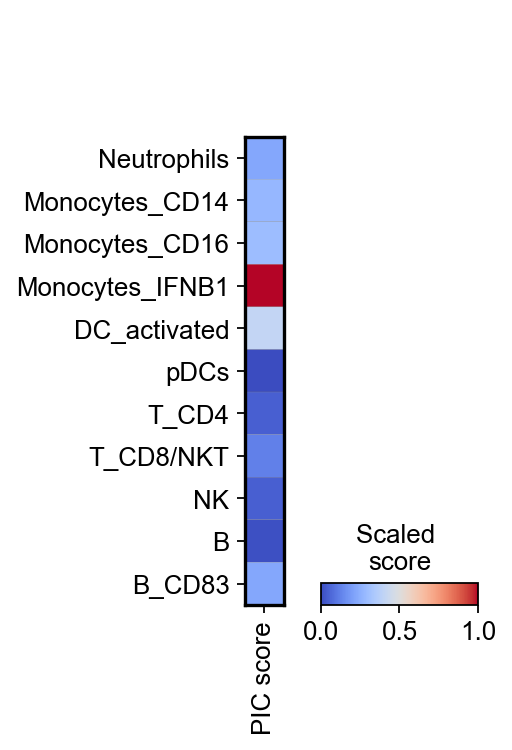

In [104]:
# Plot scores and save to pdf (craetes a "figures" folder in working directory)
sc.pl.matrixplot(adata_copy ,'PIC score',groupby ='inter_species_ann',categories_order = ['Neutrophils','Monocytes_CD14','Monocytes_CD16','Monocytes_IFNB1','DC_activated','pDCs','T_CD4','T_CD8/NKT','NK','B','B_CD83'],dendrogram=False,standard_scale='var',cmap='coolwarm',colorbar_title='Scaled \nscore',save='bat_pic_score_plot.pdf')